<a href="https://colab.research.google.com/github/sachinraghav28/data-science/blob/main/Unemployment_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all libraries there that will be used in this project

# to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# let's load the dataset
df = pd.read_csv('/content/Unemployment in India.csv')
# let's print the first five rows of data
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.shape

(768, 7)

In [ ]:
# drop missing values
df.dropna(axis = 0, inplace = True)

In [ ]:
# again check for missing values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
# Bar Plot of Average Estimated Unemployment Rate
fig = px.bar(df, x = "Region", y = " Estimated Unemployment Rate (%)", color = "Region", title = "Average unemploment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

In [ ]:
# Bar Plot of people employed in each region
fig = px.bar(df, x = "Region", y = " Estimated Employed", color = "Region", title = "People employed in each region")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

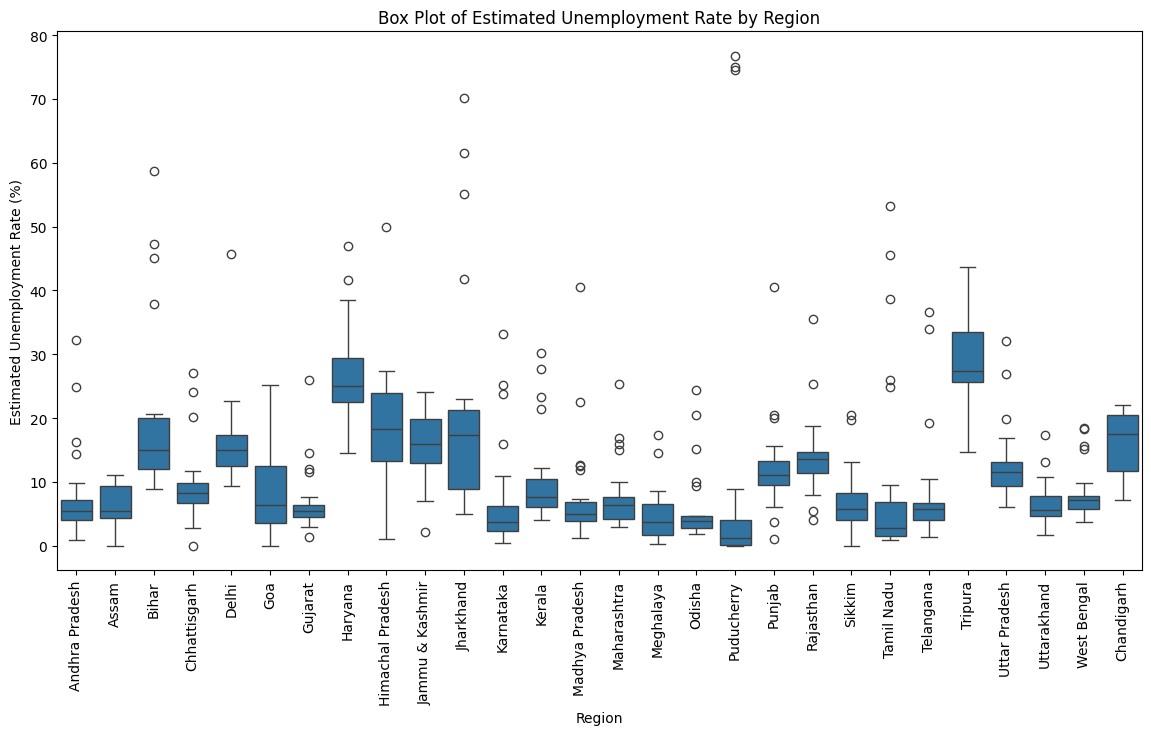

In [ ]:
plt.figure(figsize=(14, 7))
# Create the box plot with separate colors for each region
sns.boxplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df)
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Add title and axis labels
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')

# Show the plot
plt.show()

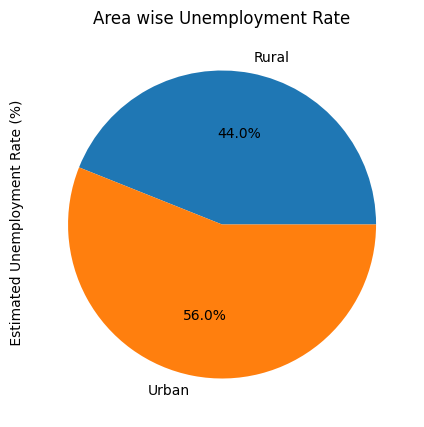

In [ ]:
# area wise unemployment rate using pie chart
plt.figure(figsize=(10,5))
df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Area wise Unemployment Rate')
plt.show()

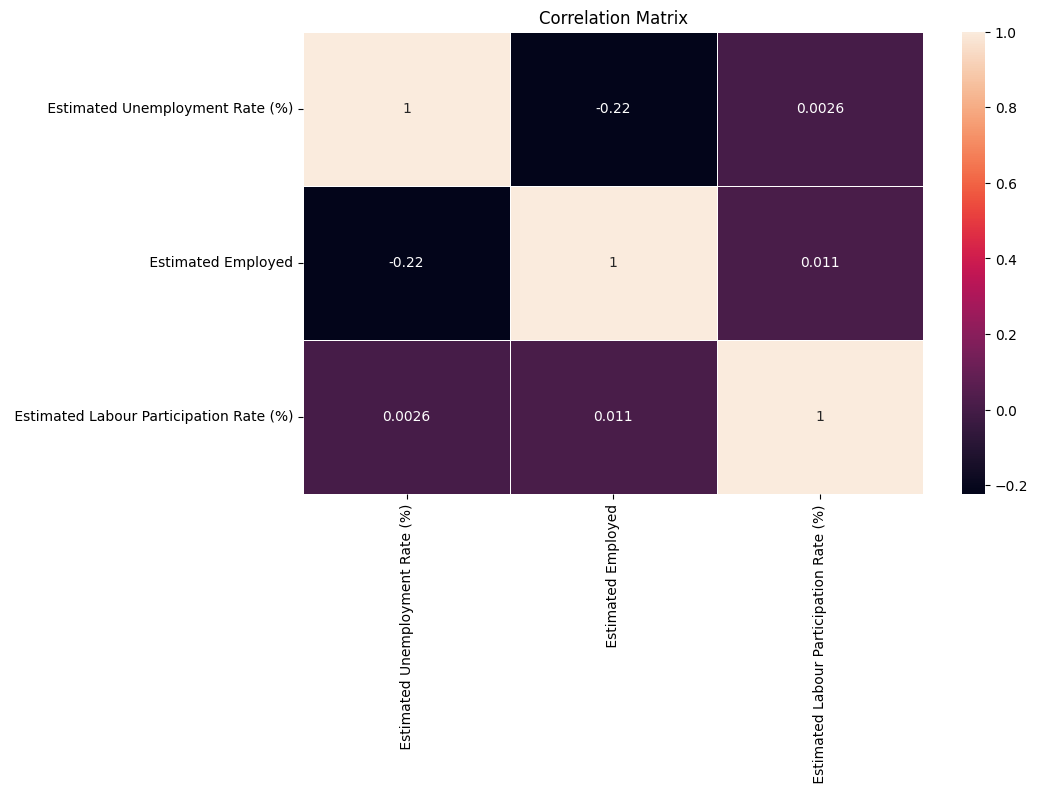

In [ ]:
# Heatmap
plt.figure(figsize=(10, 6))
corr = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
avg_unemployement_over_time = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_unemployement_over_region = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_people_employed_over_region = df.groupby('Region')[' Estimated Employed'].mean().sort_values(ascending=False).reset_index()
avg_labour_part_rate_over_region = df.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_unemployement_area_wise = df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
highest_unemployement_rate_month = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].max().sort_values(ascending=False).reset_index()

# print all the dataframes
print("Average Unemployment Rate over time\n", avg_unemployement_over_time)
print("\nAverage Unemployment Rate over Region\n", avg_unemployement_over_region)
print("\nAverage People employed over Region\n", avg_people_employed_over_region)
print("\nAverage Labour Participation Rate over Region\n", avg_labour_part_rate_over_region)
print("\nAverage Unemployment Rate over Area\n", avg_unemployement_area_wise)
print("\nHighest Unemployment Rate Month wise\n", highest_unemployement_rate_month)

Average Unemployment Rate over time
            Date   Estimated Unemployment Rate (%)
0    31-05-2020                         24.875294
1    30-04-2020                         23.641569
2    30-06-2020                         11.903600
3    31-03-2020                         10.700577
4    29-02-2020                          9.964717
5    31-01-2020                          9.950755
6    31-10-2019                          9.900909
7    30-11-2019                          9.868364
8    31-08-2019                          9.637925
9    31-12-2019                          9.497358
10   30-06-2019                          9.303333
11   30-09-2019                          9.051731
12   31-07-2019                          9.033889
13   31-05-2019                          8.874259

Average Unemployment Rate over Region
               Region   Estimated Unemployment Rate (%)
0            Tripura                         28.350357
1            Haryana                         26.283214
2       